# <a id='toc1_'></a>[**EDA Template**](#toc0_)

Name  
Topic  
email  
June 4th, 2023  


**Table of contents**<a id='toc0_'></a>    
- [**EDA Template**](#toc1_)    
  - [Setup](#toc1_1_)    
  - [**Exploratory Data Analysis**](#toc1_2_)    
    - [Univariate Analysis](#toc1_2_1_)    
    - [Bivariate Analysis](#toc1_2_2_)    
    - [Clustering Analysis](#toc1_2_3_)    
  - [Insights and Conclusions](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Setup](#toc0_)

These are the necessary libraries to import

In [1]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Print all th versions of the libraries
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
print(f"SKLearn version: {sk.__version__}")

# Set the random.seed(42)
np.random.seed(42)


Pandas version: 2.0.2
Numpy version: 1.23.4
Seaborn version: 0.12.2
Matplotlib version: 3.6.2
SKLearn version: 1.2.2


This is a demo dataset for this template. To use just make sure to replace the df with your own dataset.

In [2]:
# Import the function to load the Iris dataset from sklearn.datasets
from sklearn.datasets import load_iris

# Load the Iris dataset into a variable called iris
iris = load_iris()

# Convert the Iris dataset into a pandas DataFrame. The data is contained in iris.data and the column names in iris.feature_names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a new column to the DataFrame for the target variable (the species of Iris flower). The target values are contained in iris.target
df['target'] = iris.target

# Display the first five rows of the DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## <a id='toc1_2_'></a>[**Exploratory Data Analysis**](#toc0_)


### <a id='toc1_2_1_'></a>[Basic EDA: Univariate Analysis](#toc0_)

Non-Numerical Features:

# Bar plots for categorical variable 'target'
plt.figure(figsize=(10,6))
sns.countplot(x='target', data=df)
plt.show()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


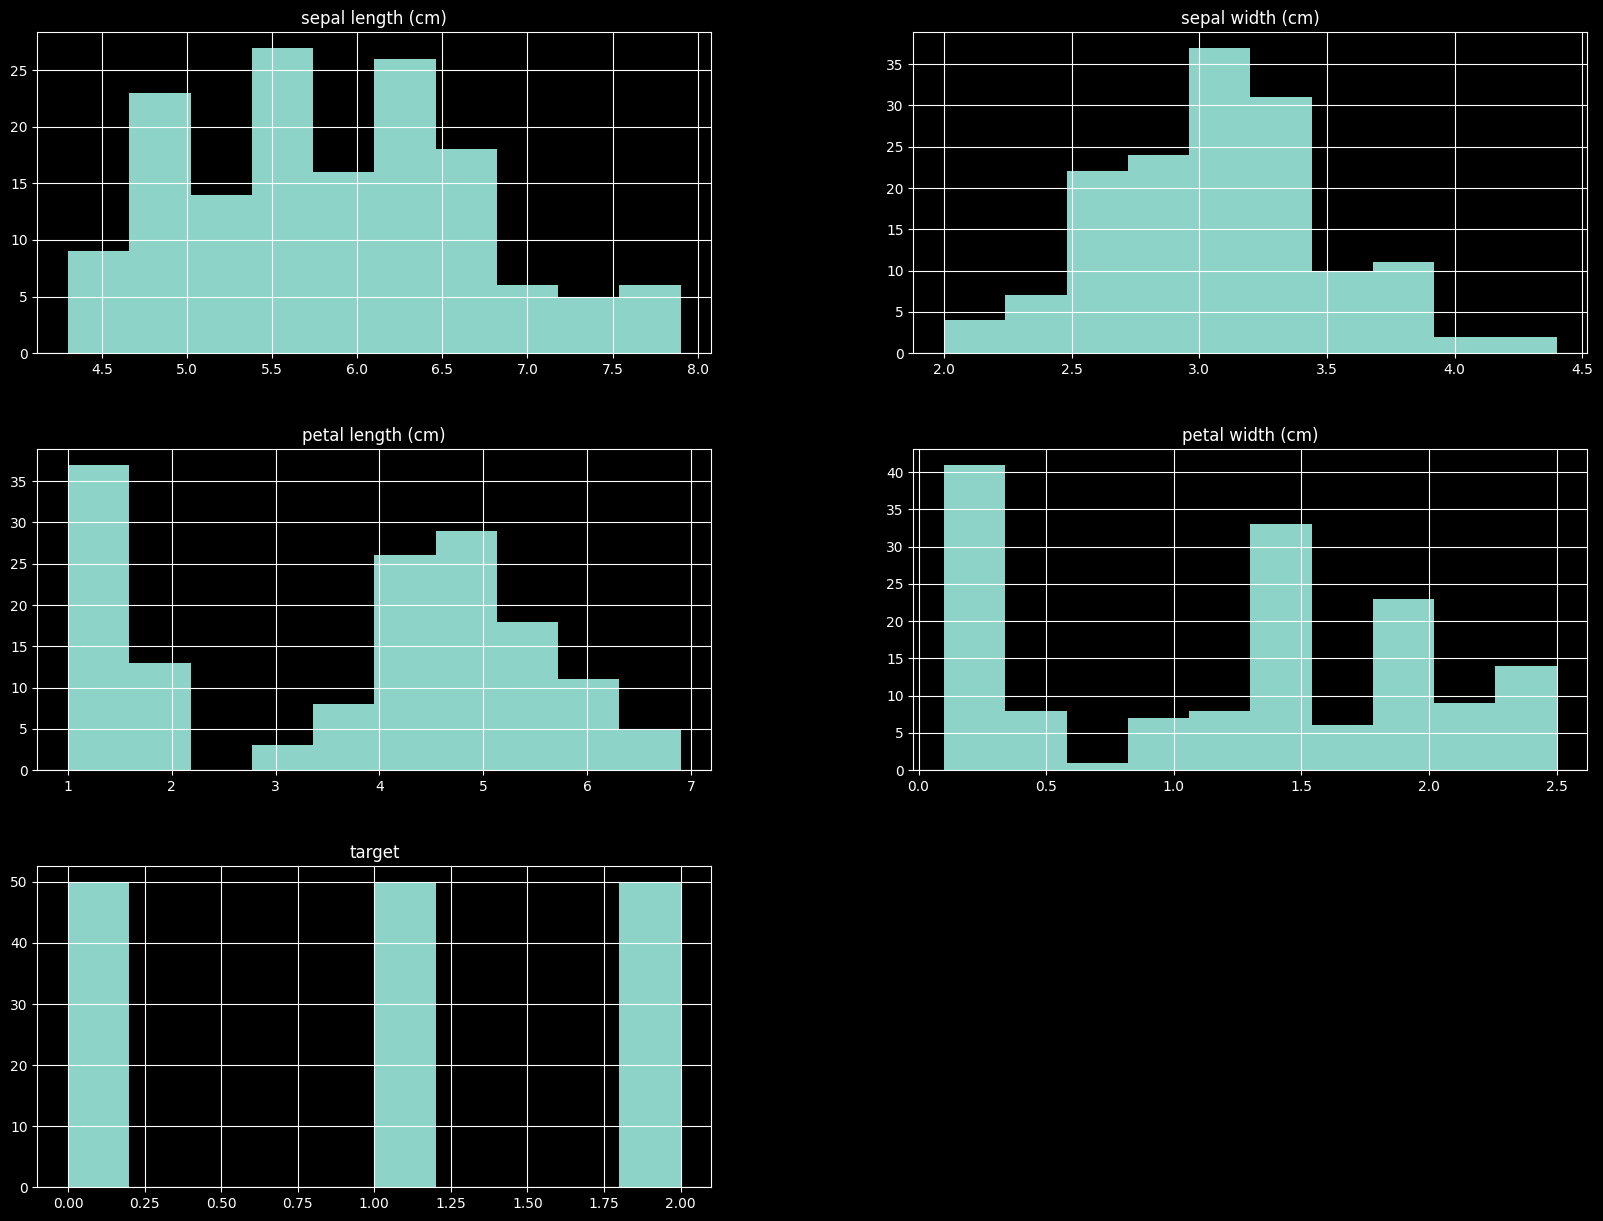

In [3]:
# Univariate Analysis
display(df.describe().T)

# Histograms for each numeric variables
df.hist(bins=10, figsize=(20,15))
plt.show()


### <a id='toc1_2_2_'></a>[Basic EDA: Bivariate Analysis](#toc0_)

In [4]:
# Compute the correlation matrix for the Iris DataFrame. This will give us the correlation coefficient between every pair of features (including the target).
correlation = df.corr()

# Display the correlation matrix, transposed for readability and sorted by the 'target' column. This gives us an idea of which features are most strongly correlated with the target.
# The 'style.background_gradient' method is used to apply a color gradient to the 'target' column, making it easier to visually identify high and low correlation values.
display(correlation.T.sort_values('target').style.background_gradient(subset='target', cmap='coolwarm'))


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


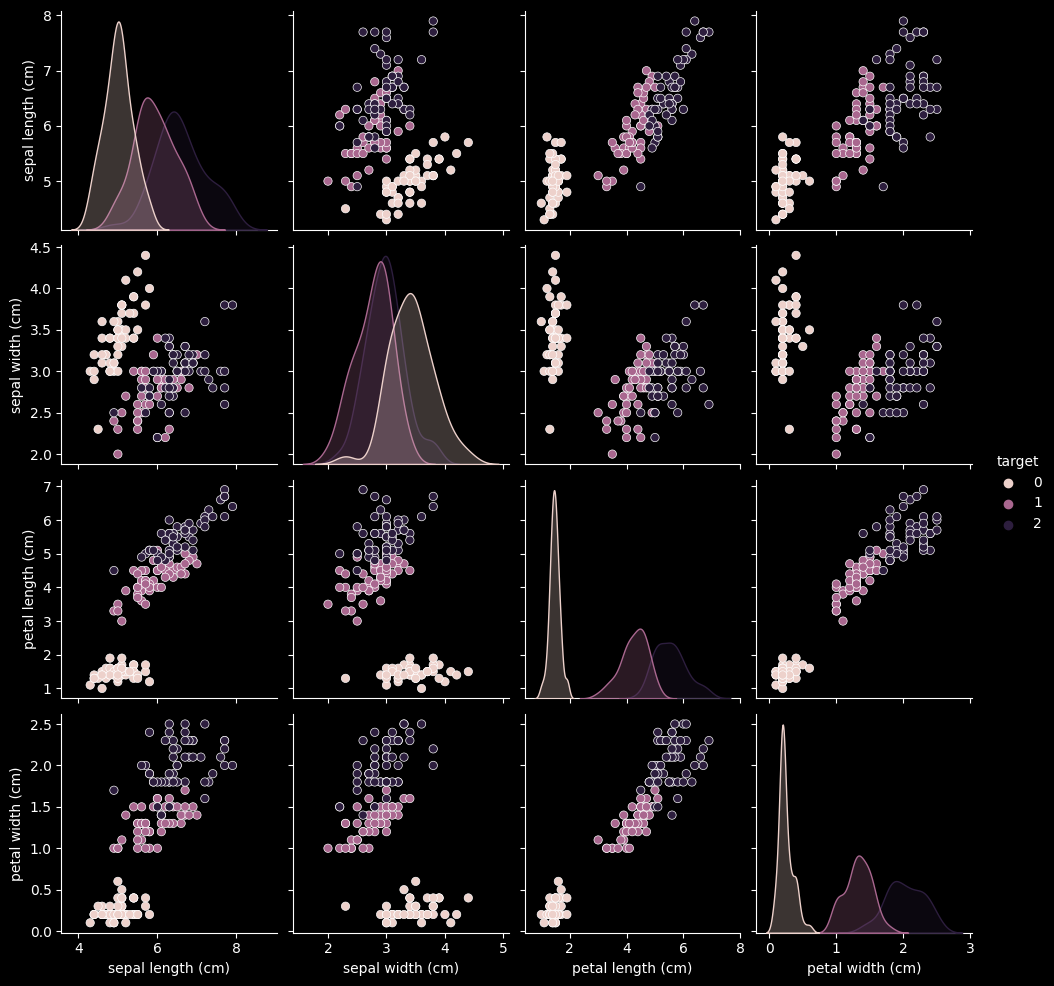

In [5]:
# Create pairplot of the Iris DataFrame, colored by the 'target' column. This helps visualize the distribution and relationship of each pair of features.
sns.pairplot(df, hue='target')
plt.show()


### <a id='toc1_2_3_'></a>[Advanced EDA: Clustering](#toc0_)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


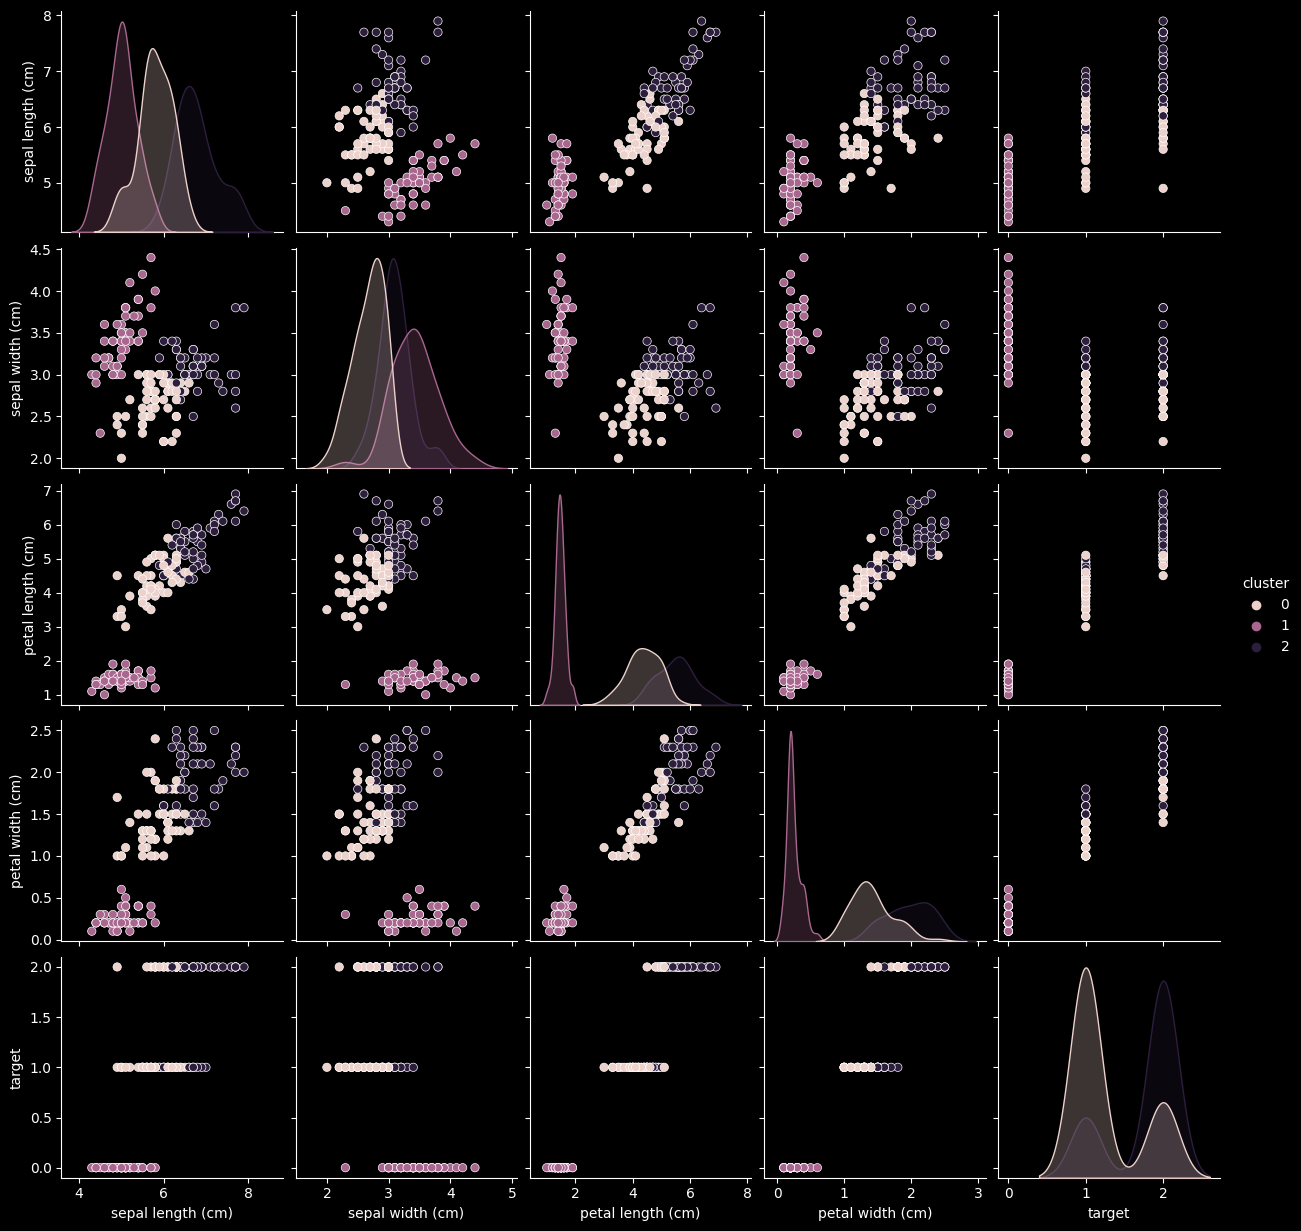

In [6]:
# Prepare the feature matrix by dropping the 'target' column from the original DataFrame.
X = df.drop('target', axis=1)

# Standardize the features to have a mean of 0 and standard deviation of 1. This is necessary for many machine learning algorithms.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering on the standardized features, specifying 3 clusters (to match the number of Iris species).
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Add the cluster labels generated by K-Means to the original DataFrame.
df['cluster'] = kmeans.labels_

# Create pairplot of the Iris DataFrame, this time colored by the 'cluster' column. This helps visualize how well K-Means was able to separate the different Iris species.
sns.pairplot(df, hue='cluster')
plt.show()


## <a id='toc1_3_'></a>[Insights and Conclusions](#toc0_)

Based on the univariate and bivariate analysis we performed on the Iris dataset, we can make the following observations:

1. **Univariate Analysis**: The variables 'sepal_width', 'sepal_length', 'petal_width', and 'petal_length' all follow a somewhat normal distribution, with some having a slightly skewed distribution. The 'species' variable, which is categorical, has an equal distribution of classes, meaning we have a balanced dataset.

2. **Bivariate Analysis**: The correlation matrix and pairplot give us an idea of the relationship between variables. 'Petal_length' and 'petal_width' show a strong positive correlation, meaning they increase together. Similarly, 'sepal_length' and 'petal_length' as well as 'sepal_length' and 'petal_width' show a strong positive correlation. 'Sepal_length' and 'sepal_width' show a negative correlation, meaning as one increases, the other decreases. These correlations indicate that petal measurements may be a good predictor of species type.

3. **Clustering Analysis**: KMeans clustering was performed on the data and it grouped the data into three clusters. When we compare these clusters with the original 'species' labels, we can see a good overlap, which indicates that the clusters formed are meaningful and reflect the natural groupings in the data. However, there are some misclassifications, particularly between the Versicolor and Virginica species. This could be due to the fact that these two species are more similar to each other in terms of sepal and petal measurements compared to the Setosa species, which is more distinct.

In conclusion, this analysis shows that the Iris dataset has meaningful and significant patterns that can be captured using statistical analysis and machine learning techniques. These patterns are reflective of the underlying biological differences between different species of Iris flowers.